# Importing different libraries used for making the regression model.

In [1]:
import matplotlib.pyplot as plt #To Plot Graph for the data.
import pandas as pd #For importing and manipulating data

df = pd.read_csv (r'/covid_19_india.csv')


# Displaying the initial data.

In [2]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


# Filtering all data that indicates data before the required month, i.e., May,2021.

(Taking an extra day as the data is cumilitve and we will have to take difference later, so we need previous days data to get the increase.)

In [3]:
df_from_May = df[df['Date'] >= '2021-04-30']
df_from_May

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
14366,14367,2021-04-30,8:00 AM,Andaman and Nicobar Islands,-,-,5643,67,5875
14367,14368,2021-04-30,8:00 AM,Andhra Pradesh,-,-,962250,7928,1084336
14368,14369,2021-04-30,8:00 AM,Arunachal Pradesh,-,-,17085,59,18256
14369,14370,2021-04-30,8:00 AM,Assam,-,-,224194,1281,249926
14370,14371,2021-04-30,8:00 AM,Bihar,-,-,351162,2480,454464
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


# Filtering all data that indicates data after the required month, i.e., May,2021.

In [4]:
df_May=df_from_May[df_from_May['Date'] <= '2021-05-31']
df_May

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
14366,14367,2021-04-30,8:00 AM,Andaman and Nicobar Islands,-,-,5643,67,5875
14367,14368,2021-04-30,8:00 AM,Andhra Pradesh,-,-,962250,7928,1084336
14368,14369,2021-04-30,8:00 AM,Arunachal Pradesh,-,-,17085,59,18256
14369,14370,2021-04-30,8:00 AM,Assam,-,-,224194,1281,249926
14370,14371,2021-04-30,8:00 AM,Bihar,-,-,351162,2480,454464
...,...,...,...,...,...,...,...,...,...
15513,15514,2021-05-31,8:00 AM,Telangana,-,-,537522,3263,575827
15514,15515,2021-05-31,8:00 AM,Tripura,-,-,44063,513,51133
15515,15516,2021-05-31,8:00 AM,Uttarakhand,-,-,291580,6401,328338
15516,15517,2021-05-31,8:00 AM,Uttar Pradesh,-,-,1628456,20346,1690016


# Dropping off the columns that will not be used for the model.

In [5]:
del df_May['Time']
del df_May['State/UnionTerritory']
del df_May['ConfirmedIndianNational']

df_May

,Sno,Date,ConfirmedForeignNational,Cured,Deaths,Confirmed
14366,14367,2021-04-30,-,5643,67,5875
14367,14368,2021-04-30,-,962250,7928,1084336
14368,14369,2021-04-30,-,17085,59,18256
14369,14370,2021-04-30,-,224194,1281,249926
14370,14371,2021-04-30,-,351162,2480,454464
...,...,...,...,...,...,...
15513,15514,2021-05-31,-,537522,3263,575827
15514,15515,2021-05-31,-,44063,513,51133
15515,15516,2021-05-31,-,291580,6401,328338
15516,15517,2021-05-31,-,1628456,20346,1690016


In [6]:
del df_May['ConfirmedForeignNational']

In [7]:
df_May

,Sno,Date,Cured,Deaths,Confirmed
14366,14367,2021-04-30,5643,67,5875
14367,14368,2021-04-30,962250,7928,1084336
14368,14369,2021-04-30,17085,59,18256
14369,14370,2021-04-30,224194,1281,249926
14370,14371,2021-04-30,351162,2480,454464
...,...,...,...,...,...
15513,15514,2021-05-31,537522,3263,575827
15514,15515,2021-05-31,44063,513,51133
15515,15516,2021-05-31,291580,6401,328338
15516,15517,2021-05-31,1628456,20346,1690016


# Adding up the data of same day of different states to get data for whole Country.

The new index is added to use it as a key rather than date to make passing down data easy.

In [8]:
aggregation_functions = {'Deaths': 'sum', 'Cured': 'sum','Confirmed': 'sum'}
df_added = df_May.groupby(df_May['Date']).aggregate(aggregation_functions).reset_index()
df_added

,Date,Deaths,Cured,Confirmed
0,2021-04-30,208330,15384418,18762976
1,2021-05-01,211853,15684406,19164969
2,2021-05-02,215542,15992271,19557457
3,2021-05-03,218959,16293003,19925604
4,2021-05-04,222408,16613292,20282833
5,2021-05-05,226188,16951731,20665148
6,2021-05-06,230168,17280844,21077410
7,2021-05-07,234083,17612351,21491598
8,2021-05-08,238270,17930960,21892676
9,2021-05-09,242362,18317404,22296414


In [9]:
df_added['Deaths'] = df_added['Deaths'].diff()
df_added['Cured'] = df_added['Cured'].diff()
df_added['Confirmed'] = df_added['Confirmed'].diff()

df_added = df_added[df_added['Date'] >= '2021-05-01']

df_added

,Date,Deaths,Cured,Confirmed
1,2021-05-01,3523.0,299988.0,401993.0
2,2021-05-02,3689.0,307865.0,392488.0
3,2021-05-03,3417.0,300732.0,368147.0
4,2021-05-04,3449.0,320289.0,357229.0
5,2021-05-05,3780.0,338439.0,382315.0
6,2021-05-06,3980.0,329113.0,412262.0
7,2021-05-07,3915.0,331507.0,414188.0
8,2021-05-08,4187.0,318609.0,401078.0
9,2021-05-09,4092.0,386444.0,403738.0
10,2021-05-10,3754.0,353818.0,366161.0


# Plotting the Filtered Data

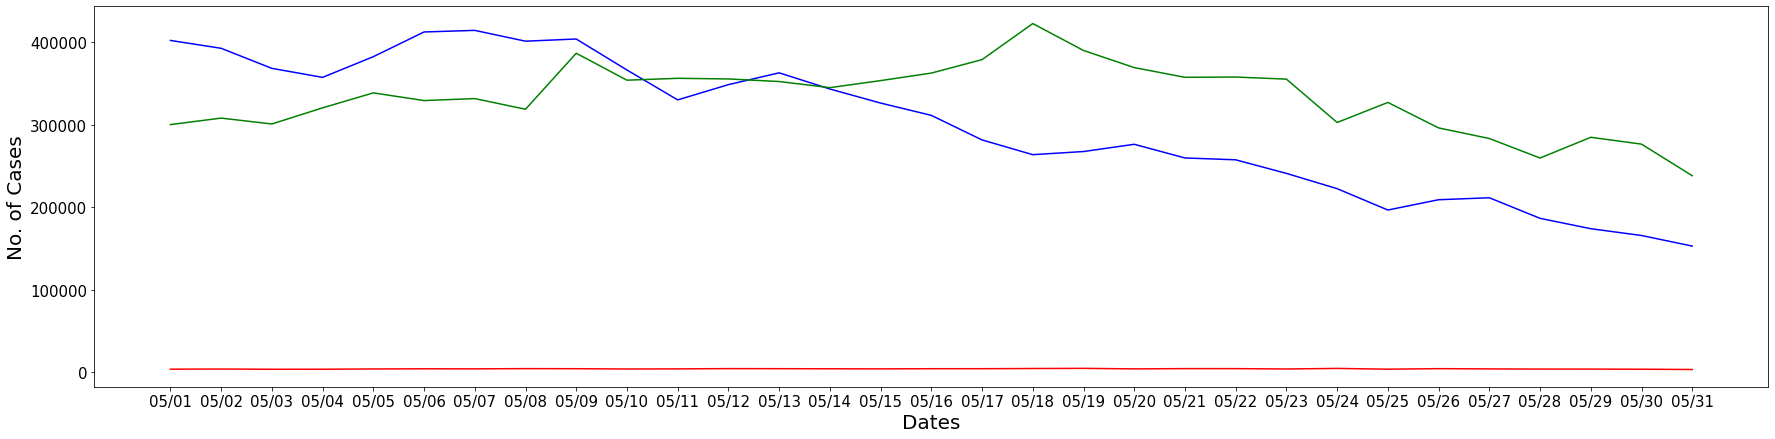

In [10]:
date_formatted= pd.to_datetime(df_added['Date']).dt.strftime('%m/%d')
plt.figure(figsize=(30, 7))

plt.plot(date_formatted, df_added['Confirmed'],color='b')
plt.plot(date_formatted, df_added['Deaths'] ,color='r')
plt.plot(date_formatted, df_added['Cured'],color='g')

plt.xlabel('Dates', size=20)
plt.ylabel('No. of Cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# Seprating Data.

### Convert Date to integers to evaluate the prediction model.

In [11]:
X=pd.to_datetime(df_added['Date']).dt.strftime('%d').to_list()
for i in range(0, len(X)):
    X[i] = int(X[i])

X

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

### Creating list for deaths

In [12]:
Y=df_added['Deaths'].to_list()

Y

[3523.0,
 3689.0,
 3417.0,
 3449.0,
 3780.0,
 3980.0,
 3915.0,
 4187.0,
 4092.0,
 3754.0,
 3876.0,
 4205.0,
 4120.0,
 4000.0,
 3890.0,
 4077.0,
 4106.0,
 4329.0,
 4529.0,
 3874.0,
 4209.0,
 4194.0,
 3741.0,
 4454.0,
 3511.0,
 4157.0,
 3847.0,
 3660.0,
 3617.0,
 3460.0,
 3128.0]

# Linear Regression Model(Assuming Linear Dependency)
Let the hypothese be Y = w0 + w1X where Y is the number of deaths and X is the day.

### Counting Variables for the calculation.

In [13]:
A = 0
B = 0
C = 0
D = 0
m=22
for i in range(0, m):
	A += X[i]
	B += Y[i]
	C += X[i] * X[i]
	D += Y[i] * (X[i])
 
print(A,B,C,D)

253 87195.0 3795 1031147.0


### Calculating Value of weights.

In [14]:
w0 = (B * C - A * D) / (m * C - A * A)
w1 = (A * B - m * D) / (A * A - m * C)

print(w0,w1)

3594.5194805194806 32.077357425183514


In [15]:
for i in range(0, m):
    print(w0 + w1 * X[i],Y[i])

3626.596837944664 3523.0
3658.6741953698474 3689.0
3690.751552795031 3417.0
3722.8289102202148 3449.0
3754.906267645398 3780.0
3786.9836250705816 3980.0
3819.060982495765 3915.0
3851.1383399209485 4187.0
3883.2156973461324 4092.0
3915.293054771316 3754.0
3947.3704121964993 3876.0
3979.4477696216827 4205.0
4011.525127046866 4120.0
4043.6024844720496 4000.0
4075.6798418972335 3890.0
4107.757199322416 4077.0
4139.834556747601 4106.0
4171.911914172784 4329.0
4203.989271597968 4529.0
4236.066629023151 3874.0
4268.1439864483345 4209.0
4300.221343873518 4194.0


### Calculating error in the last 9 days from the data set.

In [16]:
sumOfDistance = 0
for i in range(m, len(Y)):
    print((w0 + w1 * X[i] - Y[i])**2)
    sumOfDistance += (w0 + w1 * X[i] - Y[i])**2
linear_error=sumOfDistance/(2*(len(Y)-m))
print("Squared error in linear fitting : ",linear_error)

349634.1541575309
8032.450849864536
784027.752170055
73728.96099783156
376514.93842862
693365.1226329457
824033.3843053315
1203058.4315203135
2134280.1191621344
Squared error in linear fitting :  358148.62856803485


### Approximating the number of Deaths on the given dates.

In [17]:
x1=-10 #For date 20,April 2021
deaths_on_April_20=w0 + (w1 * x1)
print("deaths on 20,April 2021 : ", deaths_on_April_20)

deaths on 20,April 2021 :  3273.7459062676453


In [18]:
x2=41 #For date 10,June 2021
deaths_on_June_10=w0 + (w1 * x2)
print("deaths on 10,June 2021 : ", deaths_on_June_10)

deaths on 10,June 2021 :  4909.691134952005


### Graph Plot of resulting linear function computed

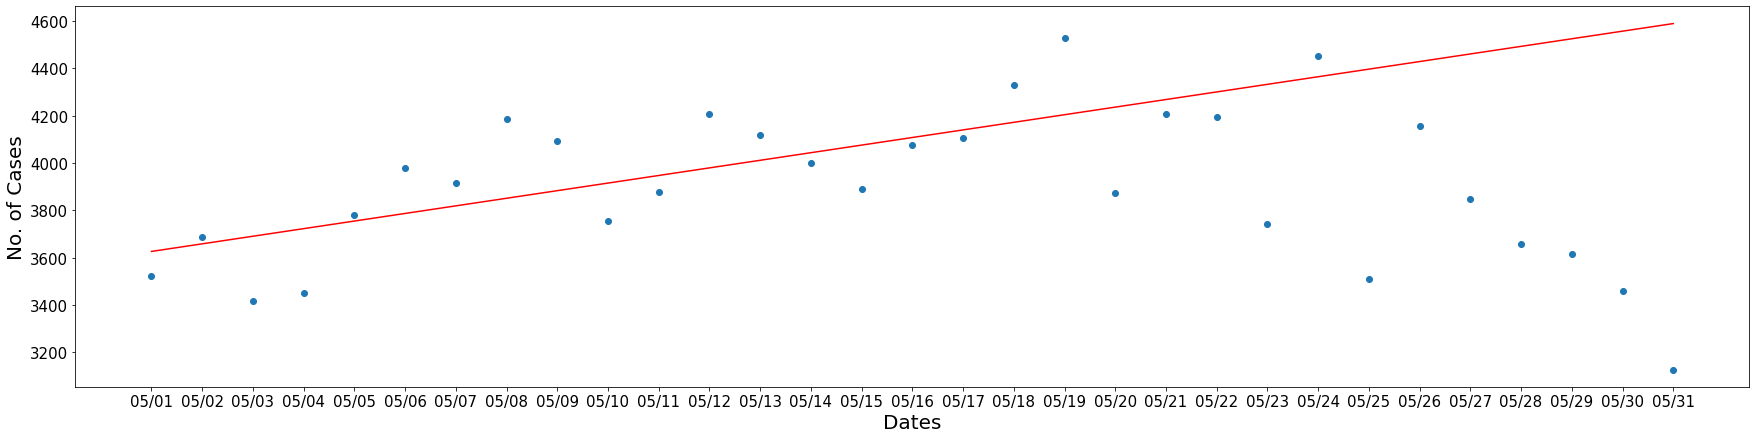

In [19]:
plt.figure(figsize=(30, 7))

plt.plot(date_formatted, [w0+w1*number for number in X],color='r')
plt.scatter(date_formatted, Y)

plt.xlabel('Dates', size=20)
plt.ylabel('No. of Cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# Linear Regression Model(Assuming Quadratic Dependency)
Let the hypothese be Y = w0 + w1*X +w2 * X^2 where Y is the number of deaths and X is the day.

### Counting Variables for the calculation.

In [20]:
X2=[number ** 2 for number in X]
X3=[number ** 3 for number in X]
X4=[number ** 4 for number in X]

XY = [X[i] * Y[i] for i in range(len(Y))]
X2Y = [X2[i] * Y[i] for i in range(len(Y))]

print(X2,X3,X4,XY,X2Y)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961] [1, 8, 27, 64, 125, 216, 343, 512, 729, 1000, 1331, 1728, 2197, 2744, 3375, 4096, 4913, 5832, 6859, 8000, 9261, 10648, 12167, 13824, 15625, 17576, 19683, 21952, 24389, 27000, 29791] [1, 16, 81, 256, 625, 1296, 2401, 4096, 6561, 10000, 14641, 20736, 28561, 38416, 50625, 65536, 83521, 104976, 130321, 160000, 194481, 234256, 279841, 331776, 390625, 456976, 531441, 614656, 707281, 810000, 923521] [3523.0, 7378.0, 10251.0, 13796.0, 18900.0, 23880.0, 27405.0, 33496.0, 36828.0, 37540.0, 42636.0, 50460.0, 53560.0, 56000.0, 58350.0, 65232.0, 69802.0, 77922.0, 86051.0, 77480.0, 88389.0, 92268.0, 86043.0, 106896.0, 87775.0, 108082.0, 103869.0, 102480.0, 104893.0, 103800.0, 96968.0] [3523.0, 14756.0, 30753.0, 55184.0, 94500.0, 143280.0, 191835.0, 267968.0, 331452.0, 375400.0, 468996.0, 605520.0, 696280.0, 784000.0, 875250.0, 1043712.0, 1186634.0, 1402596.0

In [21]:
SIG_X = 0
SIG_Y = 0
SIG_X2 = 0
SIG_X3 = 0
SIG_X4 = 0
SIG_XY = 0
SIG_X2Y = 0

m=22
for i in range(0, m):
    SIG_X += X[i]
    SIG_Y += Y[i]
    SIG_X2 += X2[i]
    SIG_X3 += X3[i]
    SIG_X4 += X4[i]
    SIG_XY += XY[i]
    SIG_X2Y += X2Y[i]
 
print(SIG_X,SIG_Y,SIG_X2,SIG_X3,SIG_X4,SIG_XY,SIG_X2Y)

253 87195.0 3795 64009 1151403 1031147.0 15642273.0


### Calculating Value of weights.

In [22]:
import numpy as np
a = np.array([[SIG_X2, SIG_X3, SIG_X4], [SIG_X, SIG_X2, SIG_X3], [m, SIG_X, SIG_X2]])
b = np.array([SIG_X2Y, SIG_XY, SIG_Y])

w = np.linalg.solve(a, b)

w

array([ 3.42514286e+03,  7.44215133e+01, -1.84105025e+00])

### Calculating error in the last 9 days from the data set.

In [23]:
def Jq(x):
    return ( w[0] + (w[1]*x) + (w[2]*x*x)) 

sumOfDistance = 0
for i in range(m, len(Y)):
    print((Jq(X[i]) - Y[i])**2)
    sumOfDistance += (Jq(X[i]) - Y[i])**2
quadratic_error=sumOfDistance/(2*(len(Y)-m))
print("Squared error in quadratic fitting : ",quadratic_error)

178018.23983808537
91921.61158586956
389406.302114087
1717.9176066117825
60220.21775636978
164480.39752700992
174760.34971645102
292511.1793555258
697158.9936571551
Squared error in quadratic fitting :  113899.73384206473


### Approximating the number of Deaths on the given dates.

In [24]:
x1=-10 #For date 20,April 2021
deaths_on_April_20=Jq(x1)
print("deaths on 20,April 2021 : ", deaths_on_April_20)

deaths on 20,April 2021 :  2496.822699040106


In [25]:
x2=41 #For date 10,June 2021
deaths_on_June_10=Jq(x2)
print("deaths on 10,June 2021 : ", deaths_on_June_10)

deaths on 10,June 2021 :  3381.6194240542277


### Graph Plot of resulting quadratic function computed

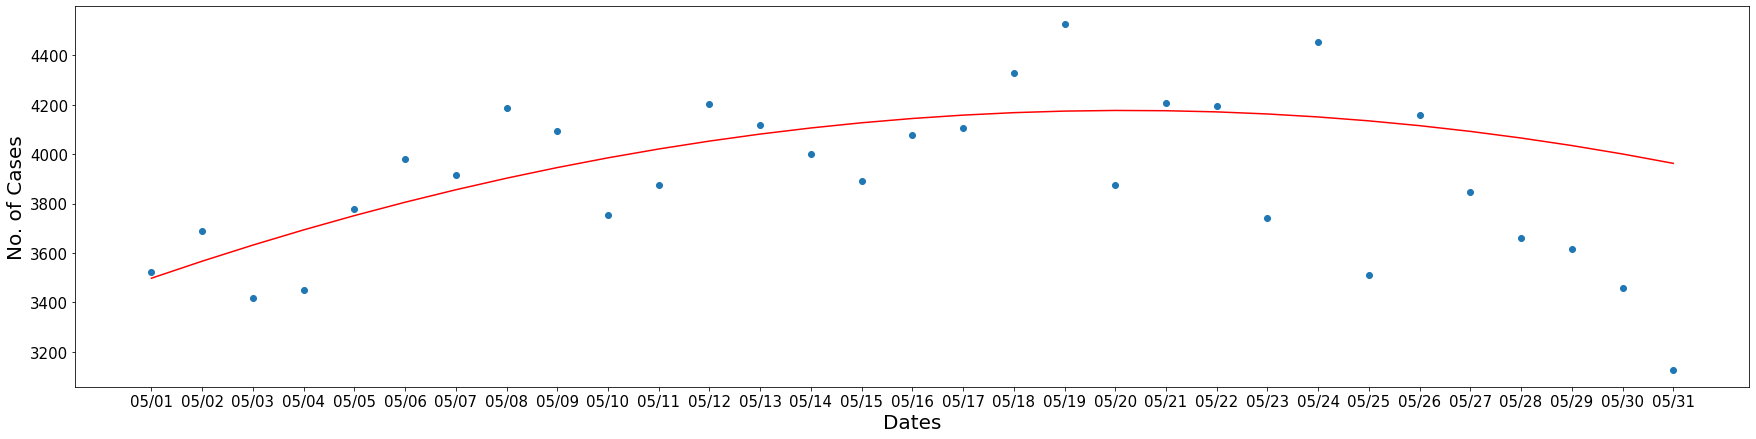

In [26]:
plt.figure(figsize=(30, 7))

plt.plot(date_formatted, [Jq(number) for number in X],color='r')
plt.scatter(date_formatted, Y)

plt.xlabel('Dates', size=20)
plt.ylabel('No. of Cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()